In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.optimize import curve_fit
from scipy import stats

# Uncertainty of Correlation Coefficient

... due to uncertainty of data points.

In [108]:
def korr(x,y,xerr,yerr,plot=False):
    
    # Calculate the pearsons coef, but allow the data to lie within the normally distributed error range
    xx = np.random.normal(x,xerr)
    yy = np.random.normal(y,yerr)
    
    if plot==True:
        label1 = "$\\rho$ = {:.2f}".format(pearsonr(x,y)[0])
        label2 = "$\\rho$ = {:.2f}".format(pearsonr(xx/1.e21,yy)[0])
        plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o', label = label1)
        plt.errorbar(xx, yy, xerr=xerr, yerr=yerr, fmt='o', label = label2)
        plt.xlabel("$N_p$ Column Density (cm$^{-2}$)")
        plt.ylabel("$\gamma$-ray Excess Counts")
        plt.legend(loc=2)
        plt.savefig("bootstrap_example.ps", bbox_inches='tight', pad_inches=0.06)
        plt.show()
        print(pearsonr(xx,yy))
    
    return pearsonr(xx,yy)[0]

In [64]:
# Put your data here
data = np.loadtxt("correlation_study_data/gamma_mopraHI_data/reg1.txt", skiprows=1)

gas = data[:,1] * 1.e21
xray = data[:,0]

gas_err = data[:,3] *1.e21
xray_err = data[:,2]

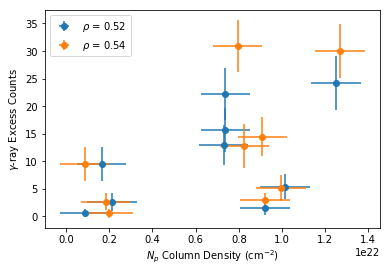

(0.5389849352479934, 0.13429268107054065)


0.5389849352479934

In [109]:
korr(gas, xray, gas_err, xray_err, True)

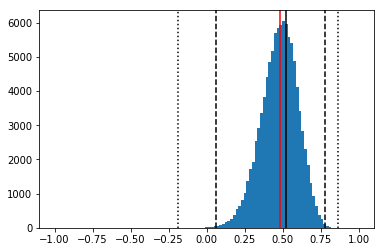

0.7755120988736562


In [61]:
k = []
for i in range(100000):
    k.append(korr(gas,xray,gas_err,xray_err))

plt.hist(k, bins=111, range=[-1,1]) #zoom in near pearson value otherwise can't see distribution?
# 3 sigma
plt.axvline(np.percentile(k, (100.0 - 99.73)/2.0), color='black', ls="--",)
plt.axvline(np.percentile(k, (100.0 - (100.0 - 99.73)/2.0)), color='black', ls="--")

# 5 sigma
plt.axvline(np.percentile(k, (100.0 - 99.99994)/2.0), color='black', ls=":")
plt.axvline(np.percentile(k, (100.0 - (100.0 - 99.99994)/2.0)), color='black', ls=":")

# correlation of original data set
plt.axvline(pearsonr(xray, gas)[0], color='black')
plt.axvline(np.percentile(k,50), color = 'red')

plt.show()
print(np.percentile(k, (100.0 - (100.0 - 99.73)/2.0)))

--> One could use (correlation coefficient + uncertainty) as some extreme value like "in the most optimistic case (uncertainty of Z sigma), the most extreme correlation coefficient is X." And then use this extreme value in the following to determine the corresponding p-value.

In [60]:
print(np.percentile(k,50))
print(np.mean(k))
print(pearsonr(gas, xray)[0])

0.48278179834161883
0.47658695640354803
0.5218632663076397


# p-value

In [30]:
def korr2(x_mean, x_sigm, y_mean, y_sigm, number):
    
    x = np.random.normal(x_mean,x_sigm,number)
    y = np.random.normal(y_mean,y_sigm,number)
    
    return pearsonr(x,y)[0]

In [58]:
# Make some assumptions about your data
# For example that they are normal distributed with specific values
# Specifiy the values

x_mean = np.mean(gas)
x_sigm = np.std(gas)
y_mean = np.mean(xray)
y_sigm = np.std(xray)
number = len(xray)

print(x_mean, x_sigm, y_mean, y_sigm)

6.506080444444444 3.8496055807687655 10.507278111111113 8.339865803397004


--> Decide a confidence level for your test if the data is correlated and determine the corresponding correlation coefficient. Then check if your optimistic value is larger (then it is correlated wrt to the CL) or smaller. You can also quote the p-value then.

2 sigma 0.6760007262866461
3 sigma 0.8608339134136412
5 sigma 0.9767186463782889


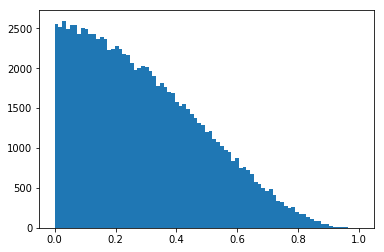

In [59]:
# This is basically finding the probablity distribution of the pearson coefficient, 
# assuming the data were distributed normally 
kk = []
for i in range(100000):
    kk.append(korr2(x_mean, x_sigm, y_mean, y_sigm, number))
  

plt.hist(np.abs(kk), bins=81, range=[0,1])

print('2 sigma', np.percentile(np.abs(kk),95.449))
print('3 sigma', np.percentile(np.abs(kk),99.73))
print('5 sigma', np.percentile(np.abs(kk),99.99994))

plt.show()

In [33]:
# A check of the method
# Compare if bootstrap result is consistent with Pearson result
print(np.abs(pearsonr(xray,gas)[0]))
print(np.percentile(np.abs(kk),100-pearsonr(xray,gas)[1]*100.))

0.3344698484927691
0.32439504262213165
